In [20]:
import numpy as np
import pandas as pd
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('Dataset .csv')

#Aggreate rattings


In [5]:
agg_rating_distribution = df['Aggregate rating'].value_counts()
print(agg_rating_distribution)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
agg_dist =  agg_rating_distribution.idxmax()
print('Most common range ' , agg_dist)

Most common range  0.0


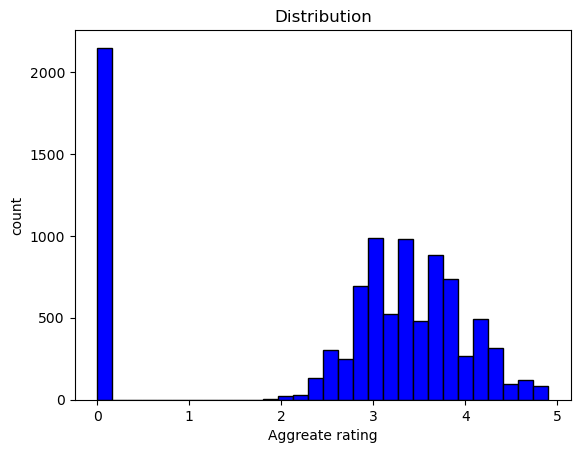

In [8]:
plt.hist(df["Aggregate rating"] ,bins = 30 ,color = 'blue' , edgecolor = 'black' )
plt.xlabel('Aggreate rating')
plt.ylabel('count')
plt.title('Distribution')
plt.show()

In [9]:
avg_vote = round(df['Votes'].mean(),3)
print("The average number of votes recived by resturant :" ,avg_vote)

The average number of votes recived by resturant : 156.91


# task 2

In [10]:
common_combinations = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False)
top10 = common_combinations.head(10)
print(top10)

Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


In [11]:
max_rating = common_combinations.iloc[0]
print("the max ratting ",max_rating)

the max ratting  4.9


In [12]:
max_rated_rest = df.loc[df["Aggregate rating"] == max_rating]
print(max_rated_rest)

      Restaurant ID                           Restaurant Name  Country Code  \
3           6318506                                      Ooma           162   
8           6300010  Spiral - Sofitel Philippine Plaza Manila           162   
10          6309903                          Silantro Fil-Mex           162   
39          6600427                                Coco Bambu            30   
48          7300955                        Braseiro da G��vea            30   
...             ...                                       ...           ...   
9484          75989            Restaurant Mosaic @ The Orient           189   
9514        5800176                          Ministry of Crab           191   
9524        6004011                              Gaga Manjero           208   
9538        5901782                                 Starbucks           208   
9540        5927248                          Draft Gastro Pub           208   

                  City                             

In [22]:
print(df[["Longitude" , "Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [23]:
gdf = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

In [24]:
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

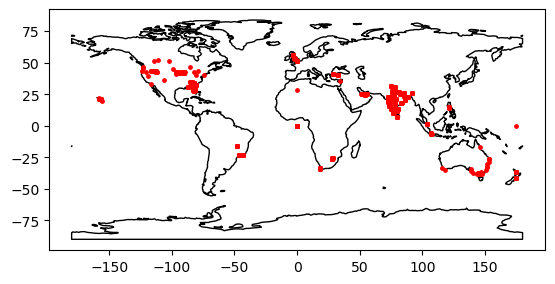

In [27]:
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(color = 'White', edgecolor = 'black')
gdf.plot(ax = ax, marker = 'o',color ='red',markersize = 6)
plt.show()

In [29]:
world_map = folium.Map(location = [df['Latitude'].mean(),df['Longitude'].mean()], zoom_start = 1 ,height = '100%',width = '100%')

In [30]:
heat_marker = [[row['Latitude'], row['Longitude'] ]for i,row in df.iterrows()]
HeatMap(heat_marker, radius = 10).add_to(world_map)

In [31]:
world_map

In [34]:
resturant_chain = df.groupby('Restaurant Name').size().reset_index(name = 'OutletCount')
new = resturant_chain[resturant_chain['OutletCount']>1]
resturant_chain = new.sort_values(by = 'OutletCount', ascending = False)

In [37]:
print(resturant_chain[['Restaurant Name' , "OutletCount"]].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


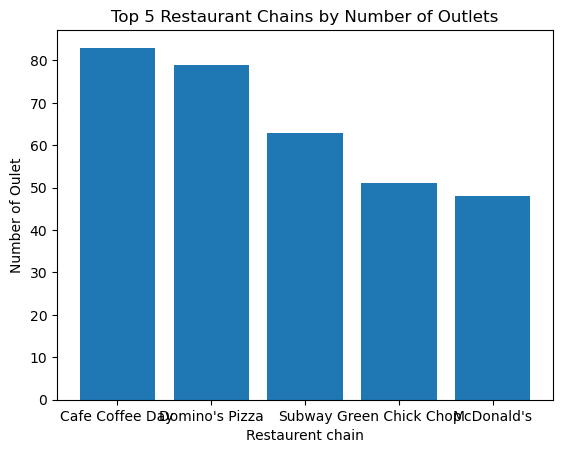

In [38]:
plt.bar(resturant_chain["Restaurant Name"][:5], resturant_chain["OutletCount"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Number of Oulet")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

In [41]:
ratings  = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name = "Average Rating").sort_values(by = "Average Rating", ascending = False )


In [50]:
Votes = df.groupby("Restaurant Name")['Votes'].sum().reset_index(name = "Total Votes").sort_values(by = "Total Votes",ascending = False)
print(Votes)

                Restaurant Name  Total Votes
663             Barbeque Nation        28142
101   AB's - Absolute Barbecues        13400
6943                       Toit        10934
785                   Big Chill        10853
2297                 Farzi Cafe        10098
...                         ...          ...
4375                  Muncheezz            0
6217            Swiss Gourmessa            0
2110      Dosa and Pizza Corner            0
6215            Sweets n Treats            0
2433               Food Station            0

[7446 rows x 2 columns]


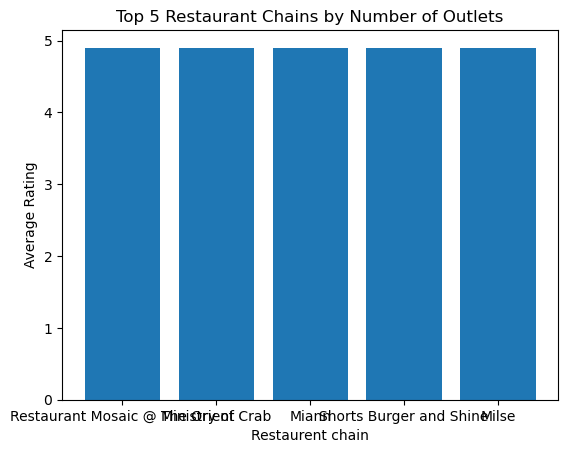

In [52]:
plt.bar(ratings["Restaurant Name"][:5], ratings["Average Rating"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Average Rating")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

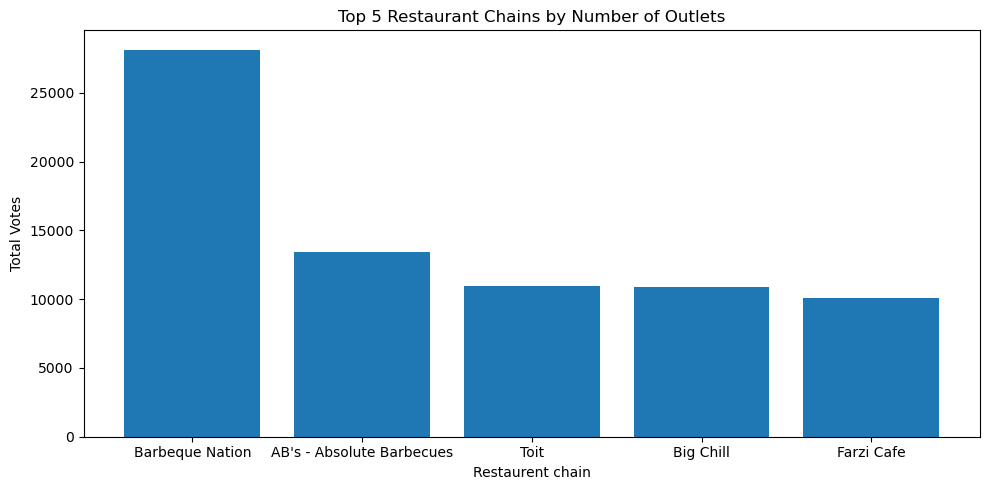

In [55]:
plt.figure(figsize=(10,5))
plt.bar(Votes["Restaurant Name"][:5], Votes["Total Votes"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.tight_layout()
plt.show()